<a href="https://colab.research.google.com/github/hideaki-kyutech/softcomp2023/blob/main/pid_control2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt update && apt install xvfb # xvfb(X11の仮想ディスプレイ)
!pip install gym-notebook-wrapper # ColabでGymの描画機能を利用するライブラリ

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [23.8 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,326 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,722 kB]
Get:13 http://archive.ubunt

In [ ]:
import gnwrapper
import gym # OpenAI-gym

- `observation[0]`: Cart Position
- `observation[1]`: Cart Velocity
- `observation[2]`: Pole Angle
- `observation[3]`: Pole Angular Velocity

- `reward`: 棒が立っている状態をキープしているとき 1

- 終了条件(`done=1`となる条件)
 1. Pole Angle が$\pm 12$&deg;以上となった時
 2. Cart Positionが$\pm 2.4$以上となった時
 3. 継続ステップ数が500以上になった時

- `env.action_space.sample()`: 0または1をランダムに出力（0=カートを左に移動、1=カートを右に移動）

In [ ]:
env = gnwrapper.LoopAnimation(gym.make('CartPole-v1')) # Xvfbが起動される

observation = env.reset()
sum_reward = 0

ang_hist = []
vang_hist =[]

for i in range(100):
    observation, reward, done, info = env.step(env.action_space.sample()) # random action
    sum_reward+=reward
    ang_hist.append(observation[2])
    vang_hist.append(observation[3])
    env.render() # ここで、描画データを保存する
    if done:
        observation = env.reset()
        print(f"The stick fell down at {i+1}th step.")
        print(f"The total reward is {sum_reward}")
        sum_reward = 0
        break

env.display() # ここで、保存した描画データをアニメーションとして表示する

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don

The stick fell down at 23th step.
The total reward is 23.0


2.339040106162429


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


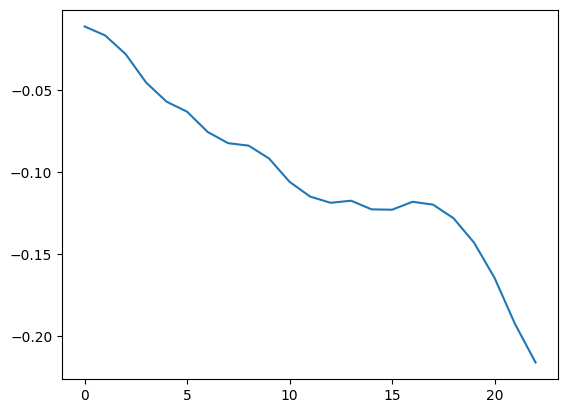

In [ ]:
import matplotlib.pyplot as plt
print(sum(abs(np.array(ang_hist))))
plt.plot(ang_hist)


In [ ]:
Kp =135
Ki = 96.5
Kd = 47.5

force = 0
integral = 0

env = gnwrapper.LoopAnimation(gym.make('CartPole-v1')) # Xvfbが起動される

observation = env.reset()
sum_reward = 0

ang_hist = []
vang_hist = []
int_hist = []
F_hist = []

for i in range(200):

  observation, reward, done, info = env.step(force)
  env.render() # ここで、描画データを保存する

  velocity = observation[1]
  angle = observation[2]
  ang_hist.append(angle)
  angular_velocity = observation[3]
  vang_hist.append(angular_velocity)

  integral = integral + angle
  int_hist.append(integral)

  F = Kp*(angle) + Kd*(angular_velocity) + Ki*(integral)
  F_hist.append(F)

  force = 1 if F > 0 else 0
  if done:
    observation = env.reset()
    print(f"The stick fell down at {i+1}th step.")
    print(f"The total reward is {sum_reward}")
    sum_reward = 0
    integral = 0
    break

env.display() # ここで、保存した描画データをアニメーションとして表示する

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don

5.1961924117204035


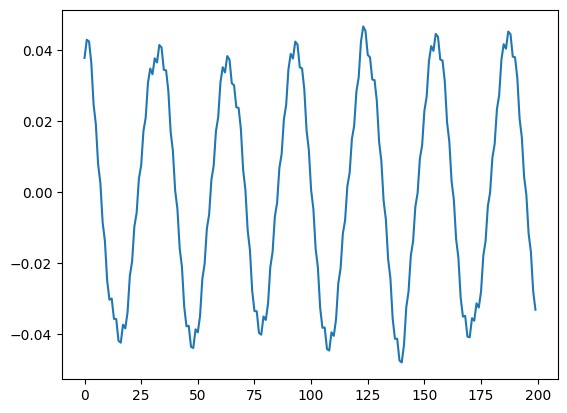

In [ ]:
print(sum(abs(np.array(ang_hist))))
plt.plot(ang_hist)

In [ ]:
!pip install UPAFuzzySystems

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=baf5a5aced22f4c25cbe96ec793b439cf0ad09f19d4aa537abdd6f7f0837f225
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from UPAFuzzySystems import fuzzy_universe, inference_system, fuzzy_controller

/usr/local/lib/python3.10/dist-packages/skfuzzy/image/__init__.py:17: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) > LooseVersion("1.8"):


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


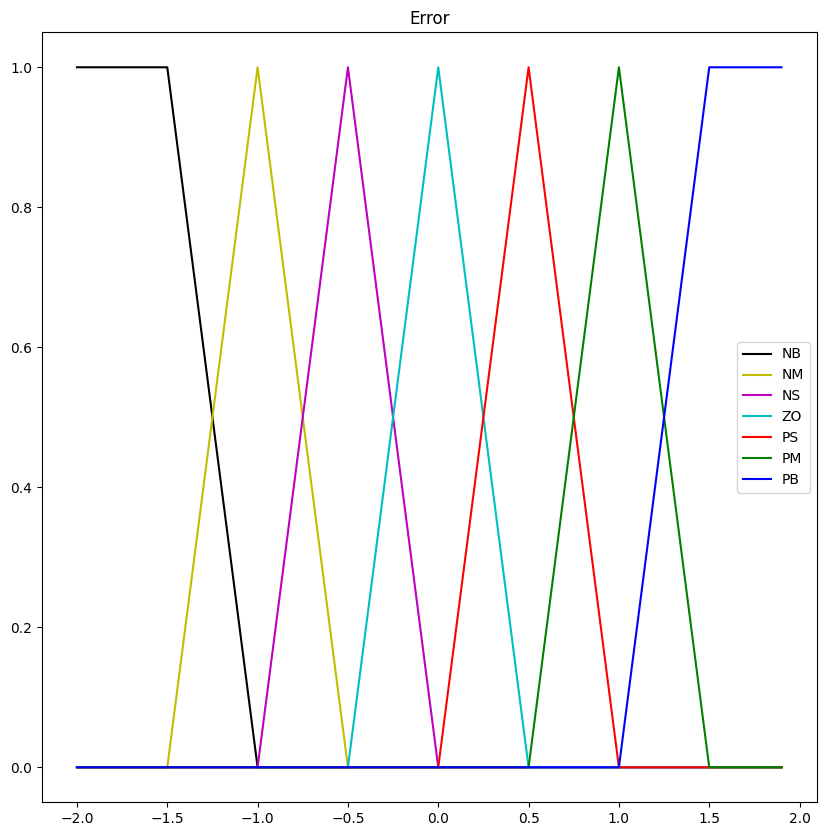

In [ ]:
Error = fuzzy_universe('Error', np.arange(-2,2,0.1), 'continuous')
Error.add_fuzzyset('NB','trapmf',[-2,-2,-1.5,-1])
Error.add_fuzzyset('NM','trimf',[-1.5,-1,-0.5])
Error.add_fuzzyset('NS','trimf',[-1,-0.5,0])
Error.add_fuzzyset('ZO','trimf',[-0.5,0,0.5])
Error.add_fuzzyset('PS','trimf',[0,0.5,1])
Error.add_fuzzyset('PM','trimf',[0.5,1,1.5])
Error.add_fuzzyset('PB','trapmf',[1,1.5,2,2])
Error.view_fuzzy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


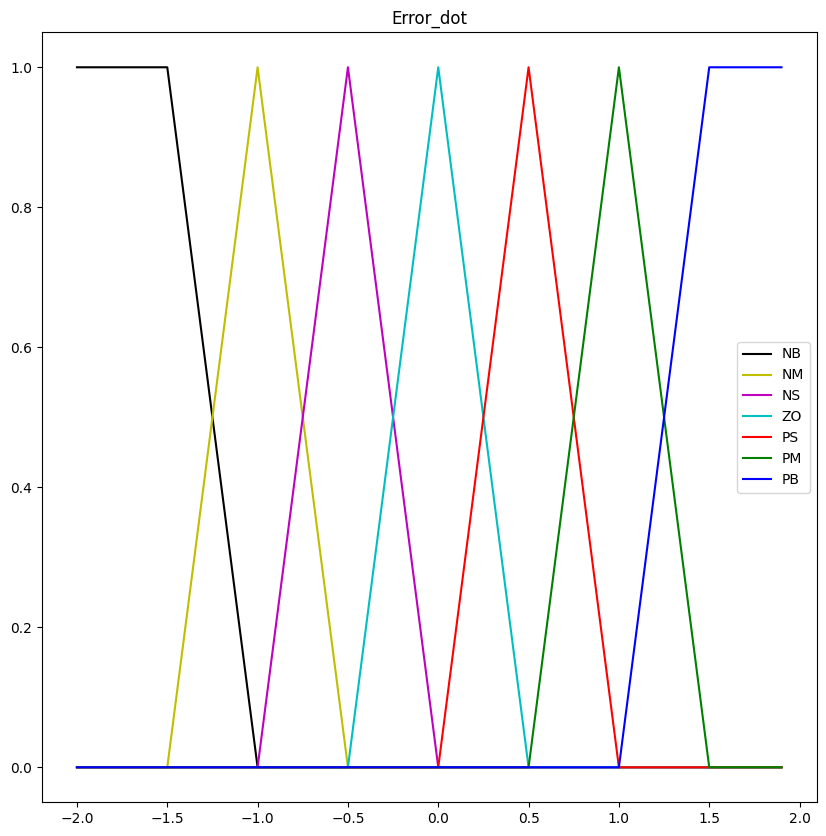

In [ ]:
Error_dot = fuzzy_universe('Error_dot', np.arange(-2,2,0.1), 'continuous')
Error_dot.add_fuzzyset('NB','trapmf',[-2,-2,-1.5,-1])
Error_dot.add_fuzzyset('NM','trimf',[-1.5,-1,-0.5])
Error_dot.add_fuzzyset('NS','trimf',[-1,-0.5,0])
Error_dot.add_fuzzyset('ZO','trimf',[-0.5,0,0.5])
Error_dot.add_fuzzyset('PS','trimf',[0,0.5,1])
Error_dot.add_fuzzyset('PM','trimf',[0.5,1,1.5])
Error_dot.add_fuzzyset('PB','trapmf',[1,1.5,2,2])
Error_dot.view_fuzzy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


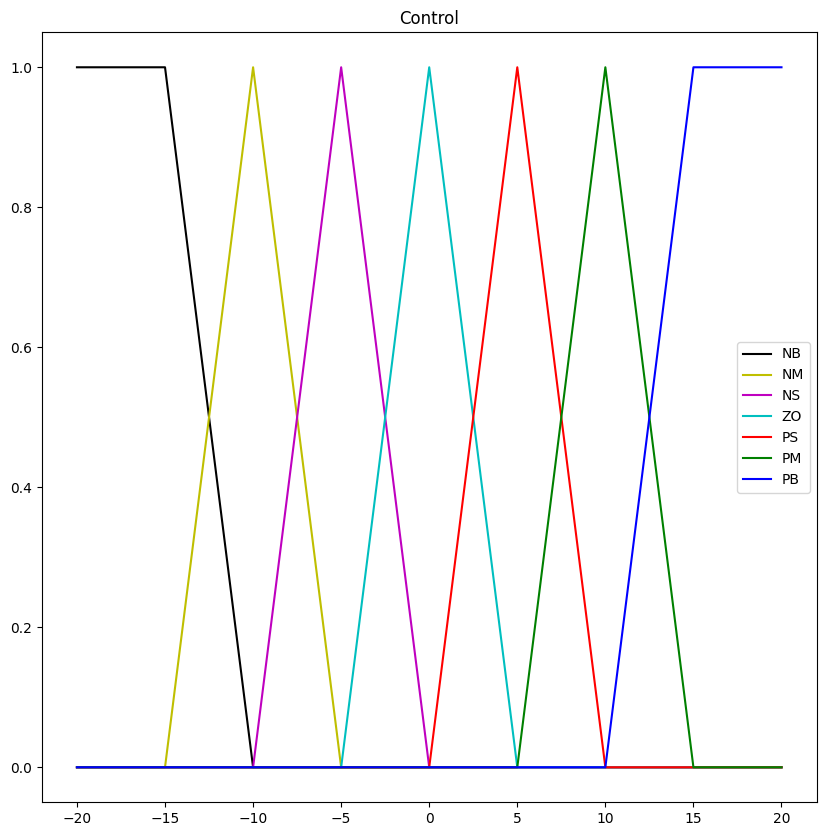

In [ ]:
Control = fuzzy_universe('Control', np.arange(-20,21,1), 'continuous')
Control.add_fuzzyset('NB','trapmf',[-20,-20,-15,-10])
Control.add_fuzzyset('NM','trimf',[-15,-10,-5])
Control.add_fuzzyset('NS','trimf',[-10,-5,0])
Control.add_fuzzyset('ZO','trimf',[-5,0,5])
Control.add_fuzzyset('PS','trimf',[0,5,10])
Control.add_fuzzyset('PM','trimf',[5,10,15])
Control.add_fuzzyset('PB','trapmf',[10,15,20,20])
Control.view_fuzzy()

In [ ]:
Mamdani = inference_system('Mamdani')
Mamdani.add_premise(Error)  # 前件部1
Mamdani.add_premise(Error_dot)     # 前件部2
Mamdani.add_consequence(Control) # 後件部

Mamdani.add_rule([['Error','NB'],['Error_dot','ZO']],['and'],[['Control','NB']])  # 規則1
Mamdani.add_rule([['Error','NM'],['Error_dot','ZO']],['and'],[['Control','NM']])  # 規則2
Mamdani.add_rule([['Error','NS'],['Error_dot','ZO']],['and'],[['Control','NS']])  # 規則3
Mamdani.add_rule([['Error','ZO'],['Error_dot','ZO']],['and'],[['Control','ZO']])  # 規則4
Mamdani.add_rule([['Error','PS'],['Error_dot','ZO']],['and'],[['Control','PS']])  # 規則5
Mamdani.add_rule([['Error','PM'],['Error_dot','ZO']],['and'],[['Control','PM']])  # 規則6
Mamdani.add_rule([['Error','PB'],['Error_dot','ZO']],['and'],[['Control','PB']])  # 規則7
Mamdani.add_rule([['Error','ZO'],['Error_dot','NB']],['and'],[['Control','NB']])  # 規則8
Mamdani.add_rule([['Error','ZO'],['Error_dot','NM']],['and'],[['Control','NM']])  # 規則9
Mamdani.add_rule([['Error','ZO'],['Error_dot','NS']],['and'],[['Control','NS']])  # 規則10
Mamdani.add_rule([['Error','ZO'],['Error_dot','PS']],['and'],[['Control','PS']])  # 規則11
Mamdani.add_rule([['Error','ZO'],['Error_dot','PM']],['and'],[['Control','PM']])  # 規則12
Mamdani.add_rule([['Error','ZO'],['Error_dot','PB']],['and'],[['Control','PB']])  # 規則13

Mamdani.configure('Mamdani')
Mamdani.build()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


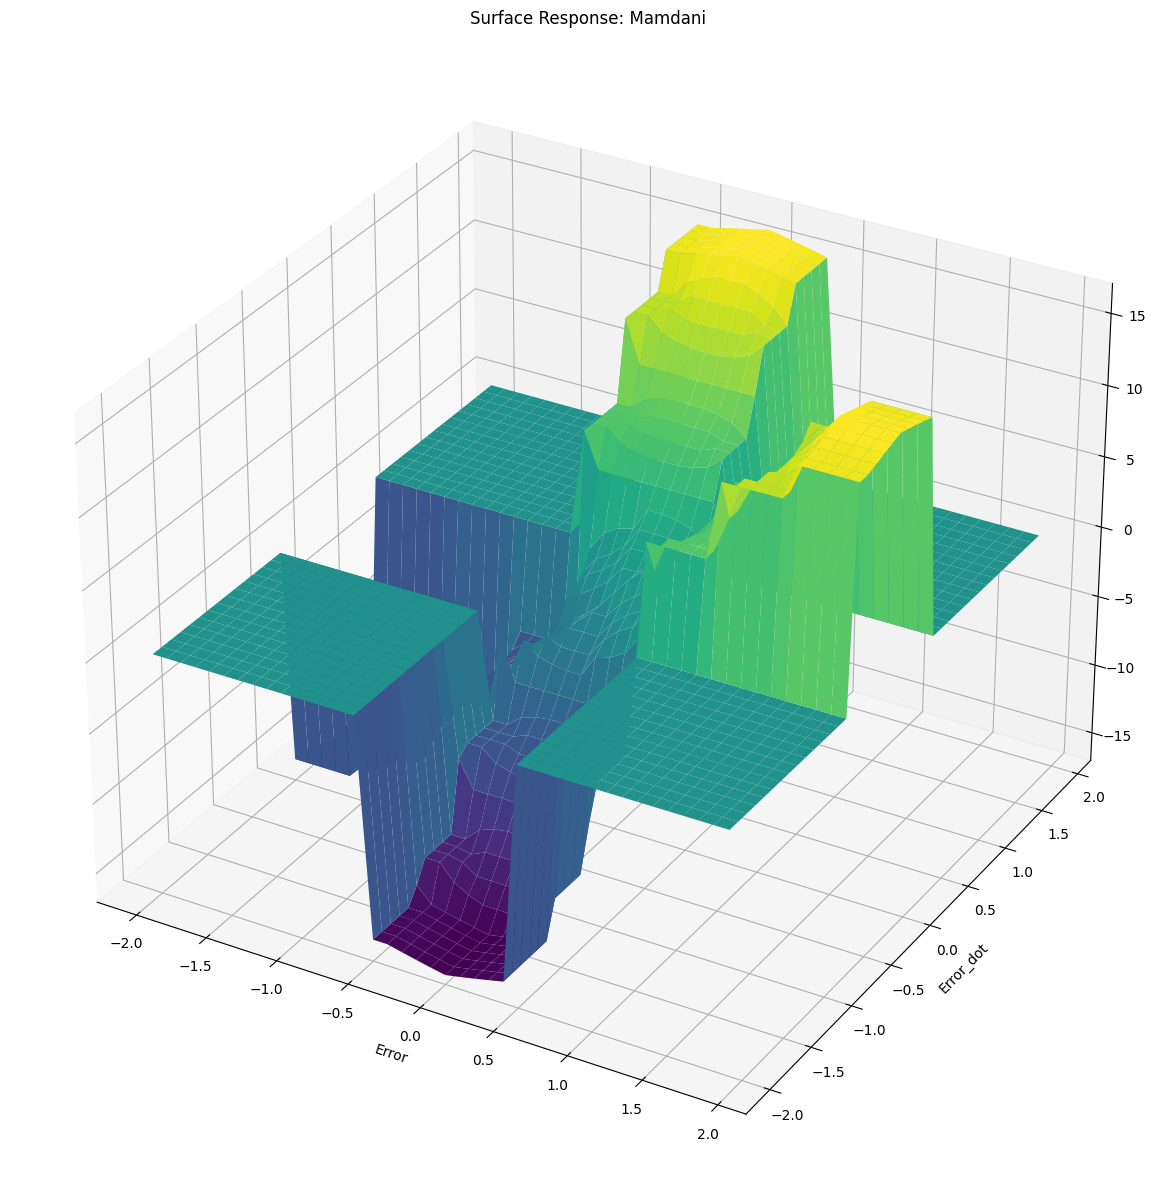

In [ ]:
vol_values = np.arange(-2,2,0.1)

Mamdani.surface_fuzzy_system([vol_values,vol_values])

In [ ]:
force = 0
integral = 0

env = gnwrapper.LoopAnimation(gym.make('CartPole-v1')) # Xvfbが起動される

observation = env.reset()
sum_reward = 0

ang_hist = []
vang_hist = []
int_hist = []
F_hist = []

for i in range(200):

  observation, reward, done, info = env.step(force)
  env.render() # ここで、描画データを保存する

  velocity = observation[1]
  angle = observation[2]
  ang_hist.append(angle)
  angular_velocity = observation[3]
  vang_hist.append(angular_velocity)

  integral = integral + angle
  int_hist.append(integral)

  F = Mamdani.fuzzy_system_sim([angle,angular_velocity])
  F_hist.append(F)

  force = 1 if F > 0 else 0
  if done:
    observation = env.reset()
    print(f"The stick fell down at {i+1}th step.")
    print(f"The total reward is {sum_reward}")
    sum_reward = 0
    integral = 0
    break

env.display() # ここで、保存した描画データをアニメーションとして表示する

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don

0.7913284538080916


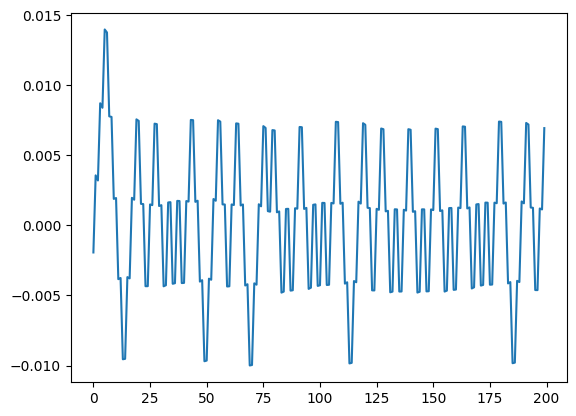

In [ ]:
print(sum(abs(np.array(ang_hist))))
plt.plot(ang_hist)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


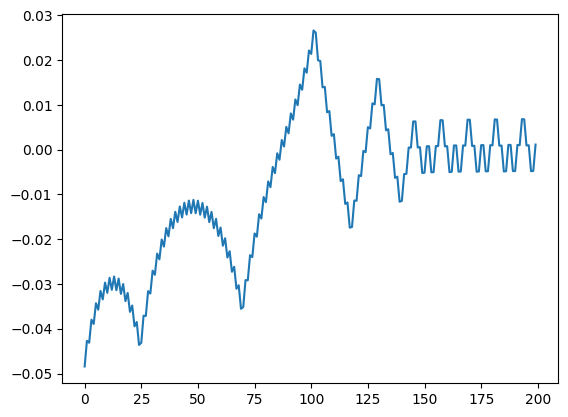

In [ ]:
plt.plot(np.array(ang_hist).reshape(200))